In [3]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

%matplotlib widget

In [ ]:
N = 3
M = 2
V = 1
T = 5
dt = 0.01

J_V_init = 0.1
J_V_final = 0.5
mu_V_init = 10
mu_V_final = 0

num_free_points = 5
num_control_points = num_free_points + 2  # Intermediate free points + 2 end points

# Run optimization
results = create_optimal_piecewise_linear_paths(N, M, T, dt, V, J_V_init, J_V_final, mu_V_init, mu_V_final, num_control_points, alpha = 2)
(times_dense, J_V_path, mu_V_path, obj_value, opt_params, t_control_opt, J_control_opt, mu_control_opt) = results

print(f"Optimized J/V:")
print(*(np.around(J_control_opt,3)), sep = ", ")
print(f"Optimized mu/V:")
print(*(np.around(mu_control_opt,3)), sep = ", ")
print(f"Optimized t/V:")
print(*(np.around(t_control_opt,3)), sep = ", ")

Optimized J/V:
0.1, 0.571, 0.986, 1.217, 1.25, 1.021, 0.5
Optimized mu/V:
10.0, 8.415, 6.833, 5.245, 3.621, 1.884, 0.0
Optimized t/V:
0.0, 0.001, 0.002, 1.519, 1.52, 1.611, 5.0


Ground State Manifold Overlap: 0.18215122007600476


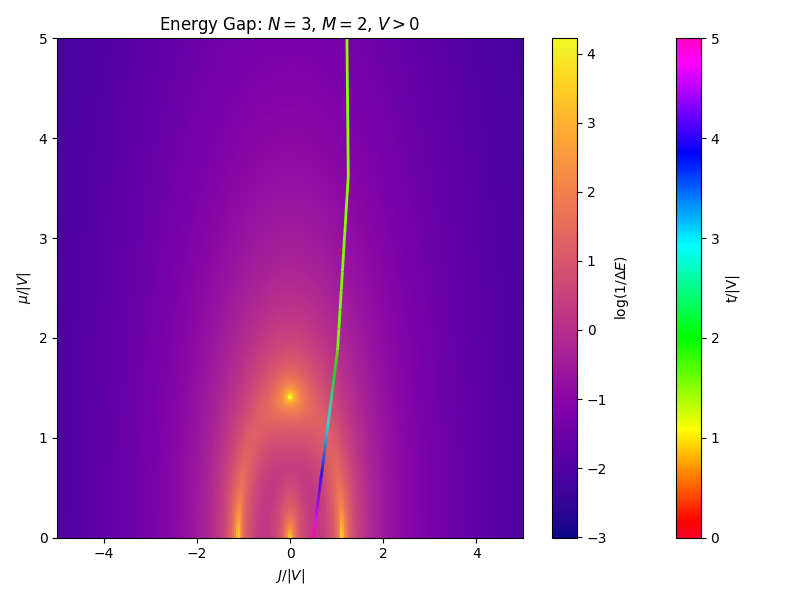

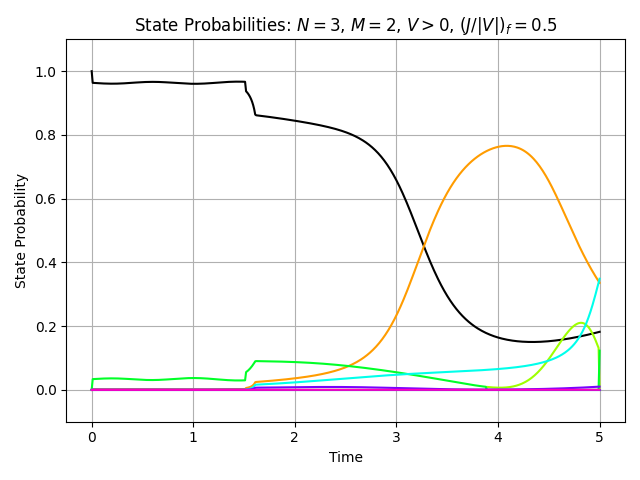

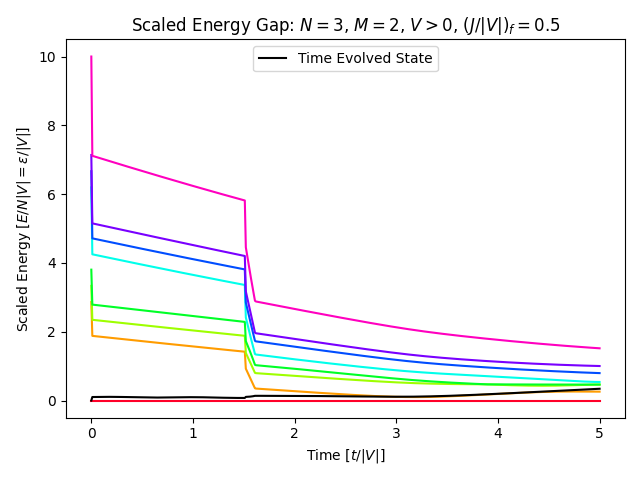

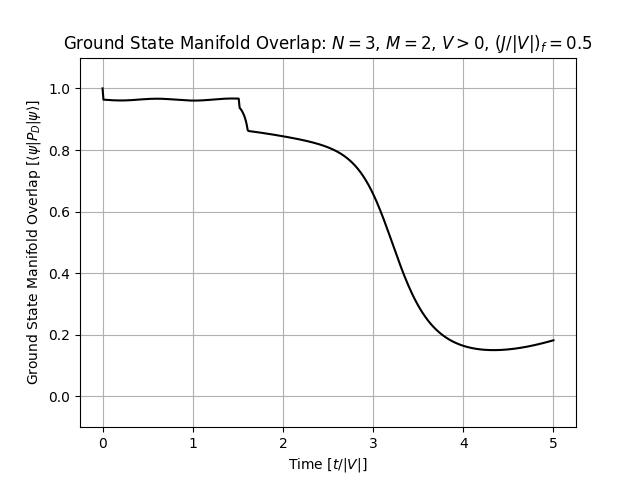

In [5]:
hamiltonians = []
for i, t in enumerate(times_dense):
    ham = construct_rescaled_hamiltonian(N, M, V, mu_V_ratio=mu_V_path[i],J_V_ratio=J_V_path[i])
    hamiltonians.append(ham)

results = simulate_hamiltonian_time_evolution(hamiltonians, times_dense)

print(f"Ground State Manifold Overlap: {results[-1][-1]}")

if np.sign(V) > 0:
    plot_time_evolution(N, M, 'positive', results, times_dense, J_V_ratios = J_V_path, mu_V_ratios = mu_V_path, plot_overlaps = False, plot_sigma = False)
else:
    plot_time_evolution(N, M, 'negative', results, times_dense, J_V_ratios = J_V_path, mu_V_ratios = mu_V_path, plot_overlaps = False, plot_sigma = False)

if np.sign(V) > 0:
    plot_data(N, M, sign_V="positive", gap_or_sigma="energy_gap", include_path = True, mu_V_ratios = mu_V_path, J_V_ratios = J_V_path, times = times_dense)
else:
    plot_data(N, M, sign_V="negative", gap_or_sigma="energy_gap", include_path = True, mu_V_ratios = mu_V_path, J_V_ratios = J_V_path, times = times_dense)

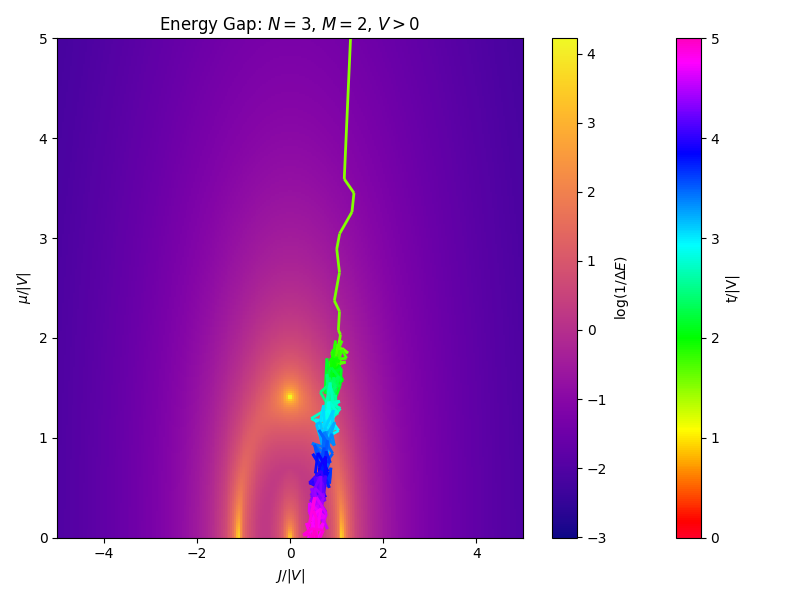

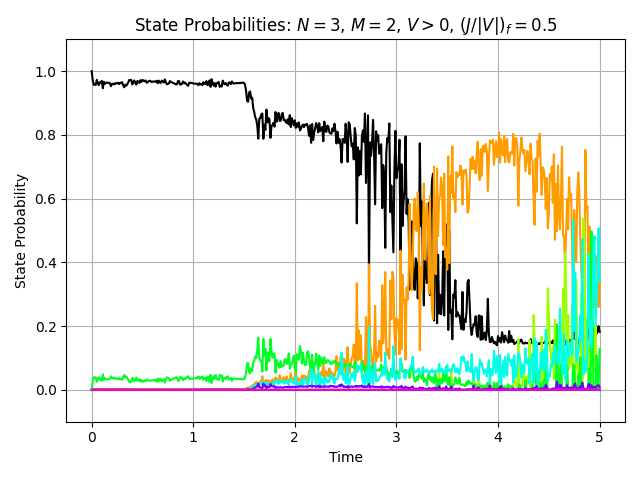

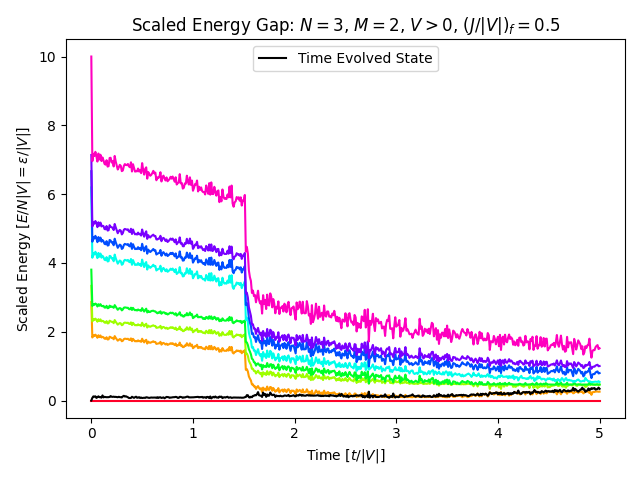

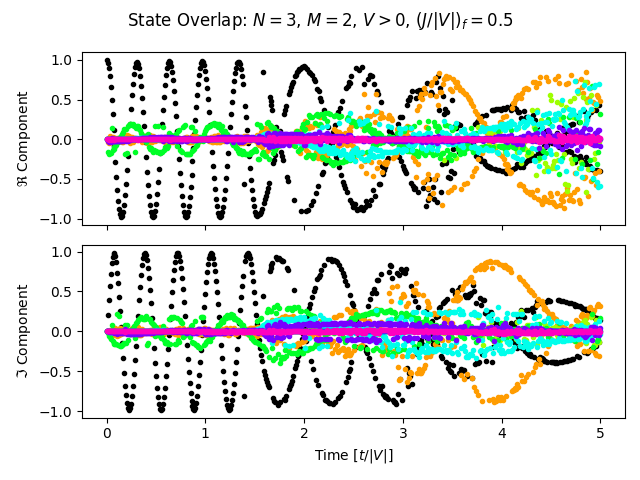

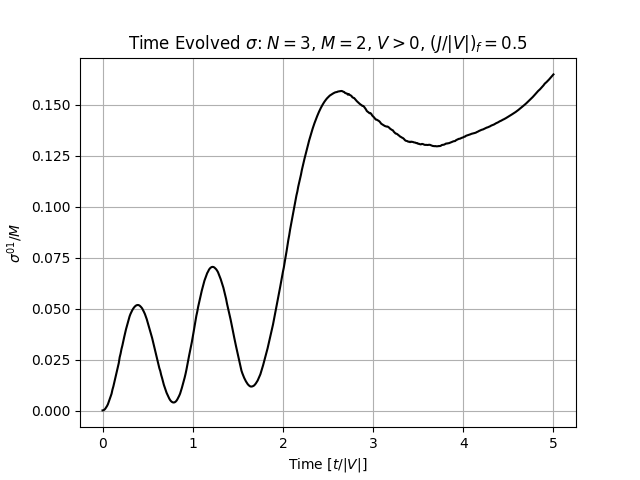

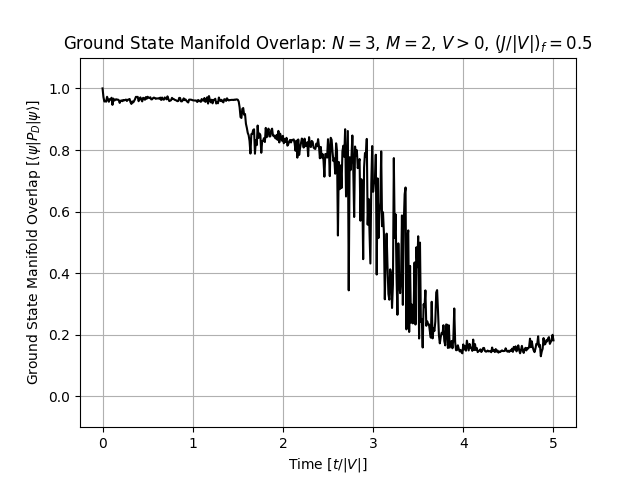

In [6]:
def make_noisy_path(path, noise_strength):
    """
    Adds Gaussian noise to the interior of the given path, leaving the first and last points unchanged.
    """
    noisy_path = path.copy()
    if len(path) > 2:
        noise = np.random.normal(0, noise_strength, size=path[1:-1].shape)
        noisy_path[1:-1] += noise
    return noisy_path

noise_strength = 0.1
J_V_path_noisy = make_noisy_path(J_V_path, noise_strength)
mu_V_path_noisy = make_noisy_path(mu_V_path, noise_strength)

noisy_hamiltonians = []
for i, t in enumerate(times_dense):
    ham = construct_rescaled_hamiltonian(N, M, V,
                                         mu_V_ratio=mu_V_path_noisy[i],
                                         J_V_ratio=J_V_path_noisy[i])
    noisy_hamiltonians.append(ham)

noisy_ham_results = simulate_hamiltonian_time_evolution(noisy_hamiltonians, times_dense)
plot_time_evolution(N, M, sign_V = "positive", results = noisy_ham_results, times = times_dense, J_V_ratios = J_V_path_noisy, mu_V_ratios = mu_V_path_noisy)

if np.sign(V) > 0:
    plot_data(N, M, sign_V="positive", gap_or_sigma="energy_gap", include_path = True, mu_V_ratios = mu_V_path_noisy, J_V_ratios = J_V_path_noisy, times = times_dense)
else:
    plot_data(N, M, sign_V="negative", gap_or_sigma="energy_gap", include_path = True, mu_V_ratios = mu_V_path_noisy, J_V_ratios = J_V_path_noisy, times = times_dense)

In [7]:
noise_strengths = np.linspace(0,0.25,25)
noisy_overlaps = []

for noise_strength in noise_strengths:
    J_V_path_noisy = make_noisy_path(J_V_path, noise_strength)
    mu_V_path_noisy = make_noisy_path(mu_V_path, noise_strength)

    noisy_hamiltonians = []
    for i, t in enumerate(times_dense):
        ham = construct_rescaled_hamiltonian(N, M, V,
                                            mu_V_ratio=mu_V_path_noisy[i],
                                            J_V_ratio=J_V_path_noisy[i])
        noisy_hamiltonians.append(ham)

    results = simulate_hamiltonian_time_evolution(noisy_hamiltonians, times_dense)
    #plot_time_evolution(N, M, results, times_dense, J_V_ratios=J_V_path_noisy, mu_V_ratios=mu_V_path_noisy, plot_overlaps = False, plot_sigma = False)
    
    (energies, time_evolved_wavefunctions, state_probabilities, state_overlaps, true_energies, ground_state_manifold_overlaps) = results
    ground_state_manifold_overlap = ground_state_manifold_overlaps[-1]
    noisy_overlaps.append(ground_state_manifold_overlap)
    
    """if np.sign(V) > 0:
        plot_data(N, M, sign_V="positive", gap_or_sigma="energy_gap", include_path = True, mu_V_ratios = mu_V_path_noisy, J_V_ratios = J_V_path_noisy, times = times_dense)
    else:
        plot_data(N, M, sign_V="negative", gap_or_sigma="energy_gap", include_path = True, mu_V_ratios = mu_V_path_noisy, J_V_ratios = J_V_path_noisy, times = times_dense)"""

(-0.1, 1.1)

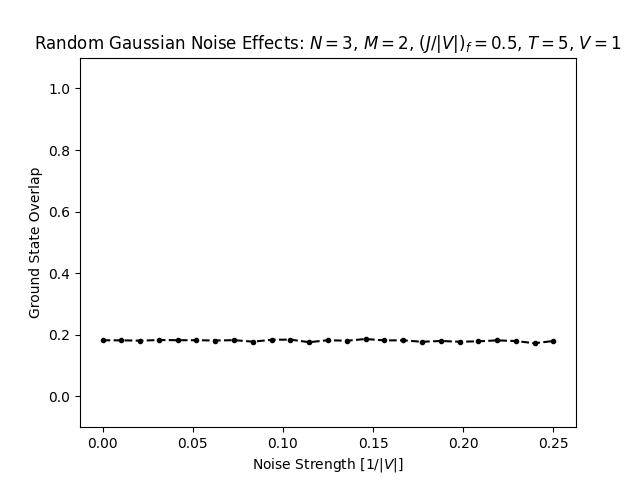

In [8]:
fig, ax = plt.subplots()
ax.plot(noise_strengths, noisy_overlaps, ".k")
ax.plot(noise_strengths, noisy_overlaps, "--k")
ax.set_title(f"Random Gaussian Noise Effects: $N={N}$, $M={M}$, $(J/|V|)_f = {J_V_final}$, $T={T}$, $V={V}$")
ax.set_xlabel("Noise Strength [$1/|V|$]")
ax.set_ylabel("Ground State Overlap")
ax.set_ylim(-0.1,1.1)